## Profiling LSF, SGD & DMRG

#### Memory, Latency & Instability

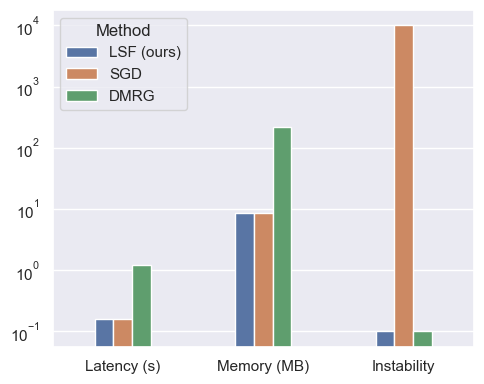

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Latency:
# BM refers to BM+DRMG
# >> python scripts/profile_models.py --horizons 128 --models bm mps --device cpu
#     latency name   R    H  Do  Di   B sweep_type  sweep_value                                                                                                                                          
# 0  1.208001   bm  32  128   2   1  32          H          128
# 1  0.161665  mps  32  128   2   1  32          H          128

# Memory:
# BM refers to BM+DRMG
# >> python scripts/profile_memory.py --d_outputs 1024 --models bm mps
#   model     d      mem_mb
# 0    bm  1024  217.106445
# 1   mps  1024    8.503418

# Instability:
# >> python scripts/profile_instability.py
#   name  iters
# 0  LSF  10000
# 1  SGD      0

sns.set_theme()

instability_fn = lambda N: 10000 - N + 0.1

# Data
df_latency_mem = pd.DataFrame({
    "Method": ["LSF (ours)", "SGD", "DMRG"],
    "Latency (s)": [0.16, 0.16, 1.2], # SGD and LSF have same latency
    "Memory (MB)": [8.5, 8.5, 217],
    "Instability": [instability_fn(10000), instability_fn(0), instability_fn(10000)],
})

# Melt the dataframe for easier plotting with seaborn
df_melted = df_latency_mem.melt(id_vars="Method", var_name="Metric", value_name="Value")

plt.figure(figsize=(5, 4))  # smaller width
sns.barplot(
    data=df_melted,
    x="Metric",
    y="Value",
    hue="Method",
    width=0.4 
)
plt.yscale("log")
ax = plt.gca()
ax.set_xlabel(None)
ax.set_ylabel(None)
plt.tight_layout()
plt.show()